https://www.kaggle.com/c/titanic
https://www.kaggle.com/alexisbcook/titanic-tutorial   
https://app.dataquest.io/m/289/introduction-to-numpy/7/selecting-columns-and-custom-slicing-ndarrays
https://neurohive.io/ru/osnovy-data-science/razbor-resheniya-zadachi-titanik-na-kaggle-dlya-nachinajushhih/
https://habr.com/ru/post/274171/
https://habr.com/ru/post/202090/
https://habr.com/ru/post/470535/ 

In [17]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.style.use('ggplot')
%matplotlib inline

os.chdir(r'C:\Users\Mr Alex\Documents\GitHub\Kaggle\Titanic')
trd = pd.read_csv('train.csv')
tsd = pd.read_csv('test.csv')

#Сливаем открытые фреймы в один
td = pd.concat([trd, tsd], ignore_index=True, sort = False)

In [ ]:
td.head(3)

In [ ]:
td.info()

In [10]:
td.shape

(1309, 12)

In [11]:
td.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [14]:
#Статистика по колонкам с объектами
td.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Kelly, Mr. James",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


In [15]:
#Статистика по всем
td.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,891.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,655.000000,0.383838,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,378.020061,0.486592,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,328.000000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,982.000000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


In [ ]:
#Только по цифровым колонкам ищем нужное нам значение
td.mean(numeric_only = True)

In [ ]:
#Тепловая карта пропущенных значений
td.isnull().sum()
sns.heatmap(td.isnull(), cbar = False).set_title("Missing values heatmap")

In [ ]:
#Статистика по родственникам на борту
td[['Parch', 'SibSp']].value_counts()

In [ ]:
#Оцениваем возраст
td["Age"].unique()
td["Age"].mean()
td_age = titanic['Age'].value_counts()
age_24_30 = td_age.loc[[24.00, 30.00]]
td.loc[:10, ["Age", "Sex"]]

In [ ]:
#Зависимая и независимые переменные. Сортировка выживших по полу и возрасту. 
td[["Survived", "Age", "Sex"]].value_counts().loc[1]

In [ ]:
#Зависимая и независимые переменные. Средняя доля выживших и среднее по возрасту и цене билета
td[["Survived", "Age", "Fare"]].mean(axis=0)

In [ ]:
#Получение сокращенного фрейма по конкретным критериям
td[td["Sex"].isin(['male'])].head()

In [ ]:
#Сортировка
td.sort_values('Age', ascending=False).head()

In [ ]:
#Агрегирование. Подсчет количества записей
td.groupby('Fare').count()

<AxesSubplot:>

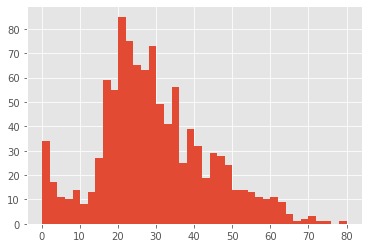

In [24]:
#Рисуем гистограмму
td['Age'].hist(bins=40)

<AxesSubplot:>

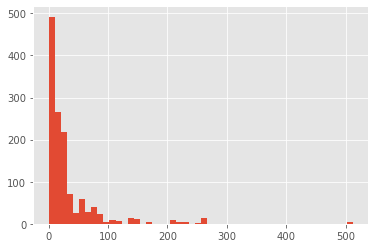

In [23]:
td['Fare'].hist(bins=50)